In [1]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to Database

In [2]:
server = 'Javad'
database = 'the_complete_journey'
driver = 'ODBC Driver 17 for SQL Server'

connection_string = f"mssql+pyodbc://{server}/{database}?trusted_connection=yes&driver={driver}"

In [3]:
engine = create_engine(connection_string)

In [4]:
try:
    with engine.connect() as conn:
        print("Connection successful!")
except Exception as e:
    print("Connection failed:", e)

Connection successful!


# Load Datasets

In [6]:
query1 = "SELECT * FROM transaction_data"
transaction_data = pd.read_sql(query1, engine)

transaction_data.head()

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,week_no,coupon_disc,coupon_match_disc
0,646,35665337945,528,1020682,2,2.38,408,0.00,76,0.0,0.0
1,646,35665337945,528,1039589,1,1.00,408,0.00,76,0.0,0.0
2,646,35665337945,528,1048440,1,1.09,408,-0.30,76,0.0,0.0
3,646,35665337945,528,1059473,1,5.85,408,-0.69,76,0.0,0.0
4,646,35665337945,528,1098066,1,0.88,408,-0.41,76,0.0,0.0


In [5]:
query2 = "SELECT * FROM hh_demographic"
hh_demographic = pd.read_sql(query2, engine)

hh_demographic.head()

,age_group,gender,income,education,household_size,household_key
0,65+ yrs,Male,$45K-$100K,Bachelor’s degree,2,1
1,45-54 yrs,Male,$45K-$100K,Bachelor’s degree,2,7
2,25-34 yrs,Female,<$45k,College diploma,3,8
3,25-34 yrs,Female,$45K-$100K,College diploma,4,13
4,45-54 yrs,Other,$45K-$100K,College training,1,16


In [38]:
query3 = "SELECT * FROM campaigns"
campaigns = pd.read_sql(query3, engine)

campaigns.head()

,description,campaign,household_key,start_day,end_day,duration
0,TypeA,1,17,224,264,41
1,TypeA,1,27,224,264,41
2,TypeA,1,212,224,264,41
3,TypeA,1,208,224,264,41
4,TypeA,1,192,224,264,41


In [9]:
query4 = "SELECT * FROM product"
product = pd.read_sql(query4, engine)

product.head()

,product_id,manufacturer,department,commodity_desc,sub_commodity_desc
0,25671,2,GROCERY,FRZN ICE,ICE - CRUSHED/CUBED
1,26081,2,MISC. TRANS.,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION
2,26093,69,PASTRY,BREAD,BREAD:ITALIAN/FRENCH
3,26190,69,GROCERY,FRUIT - SHELF STABLE,APPLE SAUCE
4,26355,69,GROCERY,COOKIES/CONES,SPECIALTY COOKIES


# 1. EDA on transaction_data table

In [9]:
transaction_data.shape

(2580564, 11)

In [38]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580564 entries, 0 to 2580563
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   basket_id          int64  
 2   day                int64  
 3   product_id         int64  
 4   quantity           int64  
 5   sales_value        float64
 6   store_id           int64  
 7   retail_disc        float64
 8   week_no            int64  
 9   coupon_disc        float64
 10  coupon_match_disc  float64
dtypes: float64(4), int64(7)
memory usage: 216.6 MB


In [41]:
transaction_data.isnull().sum()

household_key        0
basket_id            0
day                  0
product_id           0
quantity             0
sales_value          0
store_id             0
retail_disc          0
week_no              0
coupon_disc          0
coupon_match_disc    0
dtype: int64

In [8]:
summary_transaction_data = transaction_data.describe().round(2)
summary_transaction_data

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,week_no,coupon_disc,coupon_match_disc
count,2580564.00,2.580564e+06,2580564.00,2580564.00,2580564.00,2580564.00,2580564.00,2580564.00,2580564.00,2580564.00,2580564.00
mean,1271.91,3.402455e+10,388.68,2881417.35,101.02,3.12,3143.69,-0.54,56.21,-0.01,-0.00
std,726.02,4.711506e+09,189.72,3838308.01,1156.80,4.19,8938.47,1.25,27.10,0.17,0.04
min,1.00,2.698485e+10,1.00,25671.00,1.00,0.00,1.00,-180.00,1.00,-55.93,-7.70
25%,656.00,3.040799e+10,229.00,917008.00,1.00,1.29,330.00,-0.69,33.00,0.00,0.00
50%,1272.00,3.276068e+10,390.00,1027808.00,1.00,2.00,372.00,-0.04,56.00,0.00,0.00
75%,1913.00,4.012681e+10,553.00,1132770.00,1.00,3.49,422.00,0.00,80.00,0.00,0.00
max,2500.00,4.230536e+10,711.00,18316298.00,89638.00,840.00,34280.00,0.00,102.00,0.00,0.00


In [41]:
unique_transaction_data = transaction_data.select_dtypes(include='number').nunique()
unique_transaction_data

household_key          2500
basket_id            275552
day                     711
product_id            91994
quantity              11745
sales_value            5494
store_id                581
retail_disc            2395
week_no                 102
coupon_disc             285
coupon_match_disc        80
dtype: int64

In [10]:
q1 = summary_transaction_data.loc['25%']
q3 = summary_transaction_data.loc['75%']
iqr = q3 - q1
upper = q3 + iqr * 1.5
lower = q1 - iqr * 1.5
upper

household_key        3.798500e+03
basket_id            5.470504e+10
day                  1.039000e+03
product_id           1.456413e+06
quantity             1.000000e+00
sales_value          6.790000e+00
store_id             5.600000e+02
retail_disc          1.035000e+00
week_no              1.505000e+02
coupon_disc          0.000000e+00
coupon_match_disc    0.000000e+00
dtype: float64

In [11]:
transaction_data_mean = transaction_data.mean()
transaction_data_median = transaction_data.median()
transaction_data_mode = transaction_data.mode().iloc[0]

centeral_tendency = pd.DataFrame({
    'Mean': transaction_data_mean,
    'Median': transaction_data_median,
    'Mode': transaction_data_mode
})
centeral_tendency.T.round(2)

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,week_no,coupon_disc,coupon_match_disc
Mean,1271.91,3.402455e+10,388.68,2881417.35,101.02,3.12,3143.69,-0.54,56.21,-0.01,-0.0
Median,1272.00,3.276068e+10,390.00,1027808.00,1.00,2.00,372.00,-0.04,56.00,0.00,0.0
Mode,718.00,3.098377e+10,692.00,1082185.00,1.00,1.00,367.00,0.00,92.00,0.00,0.0


## Data Distribution

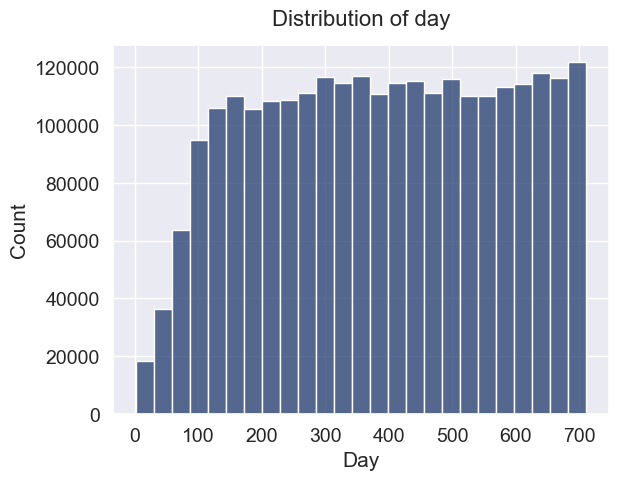

In [96]:
sns.set(
    style='darkgrid',
    palette='cividis',
    context='notebook'
)

day = sns.histplot(data=transaction_data, x='day', bins=25)

day.set_title('Distribution of day', size=16, y=1.03)
day.set_xlabel('Day', fontsize=15)
day.set_ylabel('Count', fontsize=15)
day.tick_params(axis='both', which='major', labelsize=14)

plt.show()

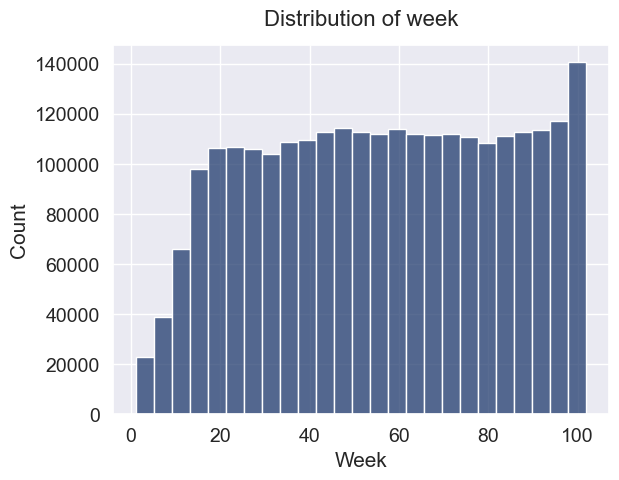

In [173]:
sns.set(
    style='darkgrid',
    palette='cividis',
    context='notebook'
)

week = sns.histplot(data=transaction_data, x='week_no', bins=25)

week.set_title('Distribution of week', size=16, y=1.03)
week.set_xlabel('Week', fontsize=15)
week.set_ylabel('Count', fontsize=15)
week.tick_params(axis='both', which='major', labelsize=14)

plt.show()

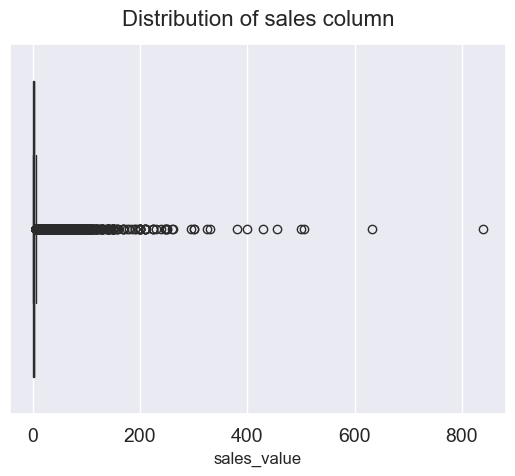

In [147]:
sns.set(
    style='darkgrid',
    palette='cividis',
    context='notebook'
)

sales_value = sns.boxplot(data=transaction_data, x='sales_value')

sales_value.set_title('Distribution of sales column', size=16, y=1.03)
sales_value.tick_params(axis='both', which='major', labelsize=14)

plt.show()

### Investigating outliers in transaction_data

**Outliers of `transaction_data` table for** `sales_value` **column.**

In [24]:
sales_outlier = transaction_data[(transaction_data['sales_value'] > upper['sales_value']) |
                                       (transaction_data['sales_value'] < lower['sales_value'])]
print('Number of Outlier for sales_value:', len(sales_outlier))
print('Number of Total transactions:', len(transaction_data))

Number of Outlier for sales_value: 190644
Number of Total transactions: 2580564


**Distinct values of** `product_id`.

In [47]:
product_id_sales_outlier = sales_outlier.value_counts('product_id')
product_id_sales_outlier

product_id
6534178     19166
916122       1663
6533765      1595
6533889      1432
6534166      1167
            ...  
1132167         1
1132282         1
1132430         1
1132562         1
18294080        1
Name: count, Length: 24719, dtype: int64

**Join relevant columns of product_id_sales_outlier table with `product` table.**

In [48]:
sales_outlier_product = sales_outlier[['product_id', 'quantity', 'sales_value']].merge(product, on='product_id', how='left')
sales_outlier_product

,product_id,quantity,sales_value,manufacturer,department,commodity_desc,sub_commodity_desc
0,1138423,1,9.29,239,GROCERY,BEERS/ALES,BEERALEMALT LIQUORS
1,9835747,1,8.42,4038,MEAT,PORK,RIBS
2,6534166,11631,30.00,69,MISC SALES TRAN,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED
3,996269,1,8.99,456,GROCERY,COFFEE,GROUND COFFEE
4,9676866,2,13.98,69,GROCERY,PAPER TOWELS,PAPER TOWELS & HOLDERS
...,...,...,...,...,...,...,...
190639,1023095,1,9.99,2586,SPIRITS,LIQUOR,LIQUEURS/SPECIALTIES (42 UNDER
190640,6553438,1,7.99,764,GROCERY,LAUNDRY ADDITIVES,FABRIC SOFTENER LIQUID
190641,5566800,1,10.49,764,DRUG GM,ANTACIDS,ANTI-ACIDS
190642,6534178,5002,12.50,69,KIOSK-GAS,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED


**Now we can see what product is the** `product_id` **6534178.**

In [49]:
sales_outlier_product[sales_outlier_product['product_id'] == 6534178]

,product_id,quantity,sales_value,manufacturer,department,commodity_desc,sub_commodity_desc
12,6534178,13066,29.25,69,KIOSK-GAS,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED
13,6534178,8933,20.00,69,KIOSK-GAS,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED
15,6534178,8265,19.00,69,KIOSK-GAS,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED
17,6534178,10874,25.00,69,KIOSK-GAS,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED
20,6534178,13045,33.90,69,KIOSK-GAS,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED
...,...,...,...,...,...,...,...
190597,6534178,8710,21.07,69,KIOSK-GAS,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED
190598,6534178,6711,16.23,69,KIOSK-GAS,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED
190602,6534178,12749,29.56,69,KIOSK-GAS,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED
190605,6534178,9642,23.32,69,KIOSK-GAS,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED


**Distinct values based on** `department` **column.**

In [50]:
sales_outlier_product.value_counts('department')

department
GROCERY            64774
DRUG GM            36823
MEAT               26926
KIOSK-GAS          21216
MEAT-PCKGD         11023
DELI                6830
MISC SALES TRAN     3917
PRODUCE             3787
PASTRY              3120
SEAFOOD-PCKGD       2779
FLORAL              2362
NUTRITION           1572
SEAFOOD             1550
SPIRITS             1441
COSMETICS           1072
SALAD BAR            669
GARDEN CENTER        397
MISC. TRANS.         192
RESTAURANT            86
AUTOMOTIVE            25
COUP/STR & MFG        21
TRAVEL & LEISUR       21
CHEF SHOPPE           15
RX                     9
FROZEN GROCERY         6
VIDEO                  3
PORK                   2
GM MERCH EXP           2
CNTRL/STORE SUP        2
POSTAL CENTER          1
DELI/SNACK BAR         1
Name: count, dtype: int64

**Check what the maximum value is for each** `department`**.**

In [51]:
sales_outlier_product.groupby('department')['sales_value'].max().sort_values(ascending=False)

department
MISC SALES TRAN    840.00
DRUG GM            631.80
MISC. TRANS.       505.00
FLORAL             324.75
KIOSK-GAS          250.00
MEAT               248.82
GROCERY            239.88
MEAT-PCKGD         167.88
GARDEN CENTER      149.90
DELI               139.98
SEAFOOD-PCKGD      139.93
SEAFOOD            139.80
COSMETICS           79.98
PASTRY              78.98
PRODUCE             77.37
SPIRITS             75.96
NUTRITION           59.88
SALAD BAR           39.61
RESTAURANT          37.65
AUTOMOTIVE          33.66
RX                  20.89
COUP/STR & MFG      20.00
CNTRL/STORE SUP     20.00
FROZEN GROCERY      14.59
VIDEO               13.99
GM MERCH EXP        12.05
TRAVEL & LEISUR     12.02
CHEF SHOPPE         10.00
POSTAL CENTER        8.95
DELI/SNACK BAR       8.02
PORK                 7.96
Name: sales_value, dtype: float64

**Check if the values in top 3 maximum** `sales_value` **of departments make sense or not.**

In [55]:
sales_outlier_product[sales_outlier_product['department']
                              .isin(['MISC SALES TRAN', 'DRUG GM', 'MISC SALES TRAN'])].sort_values('sales_value', ascending=False)

,product_id,quantity,sales_value,manufacturer,department,commodity_desc,sub_commodity_desc
135327,12484608,3,840.00,903,MISC SALES TRAN,COUPON/MISC ITEMS,ELECTRONIC GIFT CARDS ACTIVATI
13639,948670,5,631.80,2,DRUG GM,TICKETS,TICKETS
140013,13212959,1,499.99,895,DRUG GM,SPRING/SUMMER SEASONAL,OUTDOOR ROLL-UP BLINDS
155133,13506935,1,329.99,5429,DRUG GM,SPRING/SUMMER SEASONAL,PATIO SETS
164234,13381576,1,299.99,895,DRUG GM,SPRING/SUMMER SEASONAL,PATIO SETS
...,...,...,...,...,...,...,...
121223,1056836,1,6.80,3268,DRUG GM,IN-STORE PHOTOFINISHING,ONE HOUR PROCESSING
169426,1075007,1,6.80,2,DRUG GM,OVERNIGHT PHOTOFINISHING,OVERNIGHT PROCESSING
133551,1131714,1,6.80,3686,DRUG GM,IN-STORE PHOTOFINISHING,OVERNIGHT PROCESSING
64267,926646,12,6.80,2289,DRUG GM,CANDY - CHECKLANE,MINTS CANDY & BREATH (NOT LIF


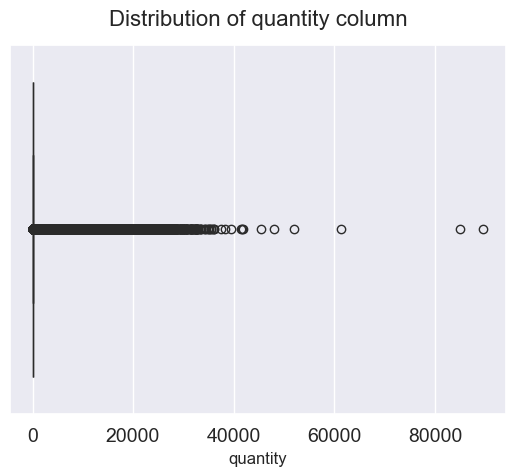

In [124]:
sns.set(
    style='darkgrid',
    palette='cividis',
    context='notebook'
)

quantity = sns.boxplot(data=transaction_data, x='quantity')

quantity.set_title('Distribution of quantity column', size=16, y=1.03)
quantity.tick_params(axis='both', which='major', labelsize=14)

plt.show()

**Outliers of `transaction_data` table for** `quantity` **column.**

In [37]:
quantity_outlier = transaction_data[(transaction_data['quantity'] > upper['quantity']) |
                                       (transaction_data['quantity'] < lower['quantity'])]
print('Number of Outlier for quantity:', len(quantity_outlier))
print('Number of Total transactions:', len(transaction_data))

Number of Outlier for quantity: 530279
Number of Total transactions: 2580564


**Distinct values of** `product_id`.

In [39]:
product_id_quantity_outlier = quantity_outlier.value_counts('product_id')
product_id_quantity_outlier

product_id
6534178     19820
995242       4764
1133018      2660
866227       2346
1029743      2170
            ...  
1218708         1
1218681         1
1218463         1
1218440         1
18292005        1
Name: count, Length: 35257, dtype: int64

**Join relevant columns of product_id_quantity_outlier table with `product` table.**

In [56]:
quantity_outlier_product = quantity_outlier[['product_id', 'quantity', 'sales_value']].merge(product, on='product_id', how='left')
quantity_outlier_product

,product_id,quantity,sales_value,manufacturer,department,commodity_desc,sub_commodity_desc
0,1020682,2,2.38,69,MEAT-PCKGD,MISCELLANEOUS,SAUERKRAUT
1,1123792,2,1.54,69,GROCERY,BATH TISSUES,TOILET TISSUE
2,1127831,2,3.34,5937,PRODUCE,BERRIES,STRAWBERRIES
3,6534166,11631,30.00,69,MISC SALES TRAN,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED
4,825541,2,3.01,2,PRODUCE,VEGETABLES SALAD,VARIETY LETTUCE
...,...,...,...,...,...,...,...
530274,920308,2,1.18,69,GROCERY,SOFT DRINKS,SFT DRNK 2 LITER BTL CARB INCL
530275,866227,2,1.00,2,PASTRY,BREAKFAST SWEETS,SW GDS:DONUTS
530276,6534178,5002,12.50,69,KIOSK-GAS,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED
530277,880150,2,8.90,2975,MEAT,BEEF,SOUP/STEW


**Distinct values based on** `department` **column.**

In [57]:
quantity_outlier_product.value_counts('department')

department
GROCERY            349839
DRUG GM             47453
PRODUCE             35440
MEAT-PCKGD          28168
MEAT                22507
KIOSK-GAS           20277
NUTRITION            6871
PASTRY               6850
DELI                 3623
MISC SALES TRAN      3267
SEAFOOD-PCKGD        2337
SALAD BAR             996
FLORAL                676
MISC. TRANS.          426
SEAFOOD               368
COSMETICS             333
GARDEN CENTER         305
SPIRITS               159
COUP/STR & MFG        106
CHEF SHOPPE            98
TRAVEL & LEISUR        64
RESTAURANT             50
FROZEN GROCERY         18
DAIRY DELI             16
GM MERCH EXP            8
POSTAL CENTER           6
VIDEO RENTAL            4
AUTOMOTIVE              3
PHOTO                   2
PHARMACY SUPPLY         2
CNTRL/STORE SUP         2
RX                      1
CHARITABLE CONT         1
DELI/SNACK BAR          1
TOYS                    1
MEAT-WHSE               1
Name: count, dtype: int64

**Check what the maximum value is for each** `department`**.**

In [58]:
quantity_outlier_product.groupby('department')['quantity'].max().sort_values(ascending=False)

department
KIOSK-GAS          89638
MISC SALES TRAN    85055
PRODUCE              144
DRUG GM               90
GROCERY               60
MEAT                  40
PASTRY                32
MISC. TRANS.          30
NUTRITION             30
FLORAL                25
MEAT-PCKGD            20
GARDEN CENTER         16
DELI                  15
SEAFOOD-PCKGD         15
COUP/STR & MFG        13
SALAD BAR             12
FROZEN GROCERY        10
TRAVEL & LEISUR       10
SEAFOOD                7
COSMETICS              6
RESTAURANT             6
VIDEO RENTAL           4
SPIRITS                4
DAIRY DELI             4
CHEF SHOPPE            4
POSTAL CENTER          4
AUTOMOTIVE             3
CNTRL/STORE SUP        3
PHOTO                  2
RX                     2
PHARMACY SUPPLY        2
CHARITABLE CONT        2
GM MERCH EXP           2
DELI/SNACK BAR         2
TOYS                   2
MEAT-WHSE              2
Name: quantity, dtype: int64

**Check if the values in top 2 maximum** `sales_value` **of departments make sense or not.**

In [61]:
quantity_outlier_product[quantity_outlier_product['department'].isin(['KIOSK-GAS', 'MISC SALES TRAN'])].sort_values('quantity', ascending=False)

,product_id,quantity,sales_value,manufacturer,department,commodity_desc,sub_commodity_desc
511184,6534178,89638,250.00,69,KIOSK-GAS,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED
245379,6544236,85055,210.00,69,MISC SALES TRAN,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED
248115,6534178,61335,150.21,69,KIOSK-GAS,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED
186247,6534178,51912,110.00,69,KIOSK-GAS,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED
426238,6534178,48073,121.10,69,KIOSK-GAS,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED
...,...,...,...,...,...,...,...
393386,1049788,2,5.65,5,MISC SALES TRAN,COUPON/MISC ITEMS,MEAT SUPPLIES
127435,12730171,2,109.90,6046,MISC SALES TRAN,COUPON/MISC ITEMS,AMERICAN EXPRESS GIFT CARD
391991,882305,2,6.00,5,MISC SALES TRAN,COUPON/MISC ITEMS,MISCELLANEOUS H & B AIDS
127173,1042697,2,3.78,5,MISC SALES TRAN,COUPON/MISC ITEMS,PRODUCE DEPT KEY RING


# 2. EDA on product table

In [65]:
product.shape

(92338, 5)

In [66]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92338 entries, 0 to 92337
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   product_id          92338 non-null  int64 
 1   manufacturer        92338 non-null  int64 
 2   department          92338 non-null  object
 3   commodity_desc      92338 non-null  object
 4   sub_commodity_desc  92338 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.5+ MB


In [67]:
product.isnull().sum()

product_id            0
manufacturer          0
department            0
commodity_desc        0
sub_commodity_desc    0
dtype: int64

In [70]:
product.describe(include='all').round(2)

,product_id,manufacturer,department,commodity_desc,sub_commodity_desc
count,92338.00,92338.00,92338,92338,92338
unique,NaN,NaN,43,307,2382
top,NaN,NaN,GROCERY,GREETING CARDS/WRAP/PARTY SPLY,CARDS EVERYDAY
freq,NaN,NaN,39021,2785,1005
mean,5328275.94,1739.51,NaN,NaN,NaN
std,5360366.04,1818.28,NaN,NaN,NaN
min,25671.00,2.00,NaN,NaN,NaN
25%,970601.25,328.00,NaN,NaN,NaN
50%,1620550.00,1094.00,NaN,NaN,NaN
75%,9704831.00,2265.00,NaN,NaN,NaN


In [18]:
unique_product = product.select_dtypes(include='number').nunique()
unique_product

product_id      92338
manufacturer     6475
dtype: int64

**Compare the number of unique values for** `product_id` **in `transaction_data` and `product` tables.**

In [22]:
print('Number of unique values of product_id in transaction_data table:', unique_transaction_data['product_id'])
print('There are MAYBE', unique_product['product_id'] - unique_transaction_data['product_id'], 'product_id that are not in transaction_data table.')

Number of unique values of product_id in transaction_data table: 91994
There are MAYBE 344 product_id that are not in transaction_data table.


## Data Distribution

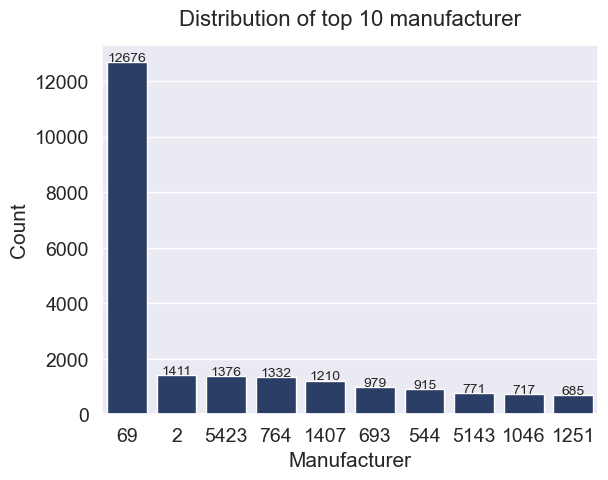

In [185]:
sns.set(
    style='darkgrid',
    palette='cividis',
    context='notebook'
)

top10_manufacturer = product['manufacturer'].value_counts(ascending=False).head(10)

manufacturer = sns.barplot(x=top10_manufacturer.index, y=top10_manufacturer.values, order=top10_manufacturer.index)

for i, v in enumerate(top10_manufacturer):
    plt.text(i, v + 40, str(v), ha='center', fontsize=10)

manufacturer.set_title('Distribution of top 10 manufacturer', size=16, y=1.03)
manufacturer.set_xlabel('Manufacturer', fontsize=15)
manufacturer.set_ylabel('Count', fontsize=15)
manufacturer.tick_params(axis='both', which='major', labelsize=14)

plt.show()

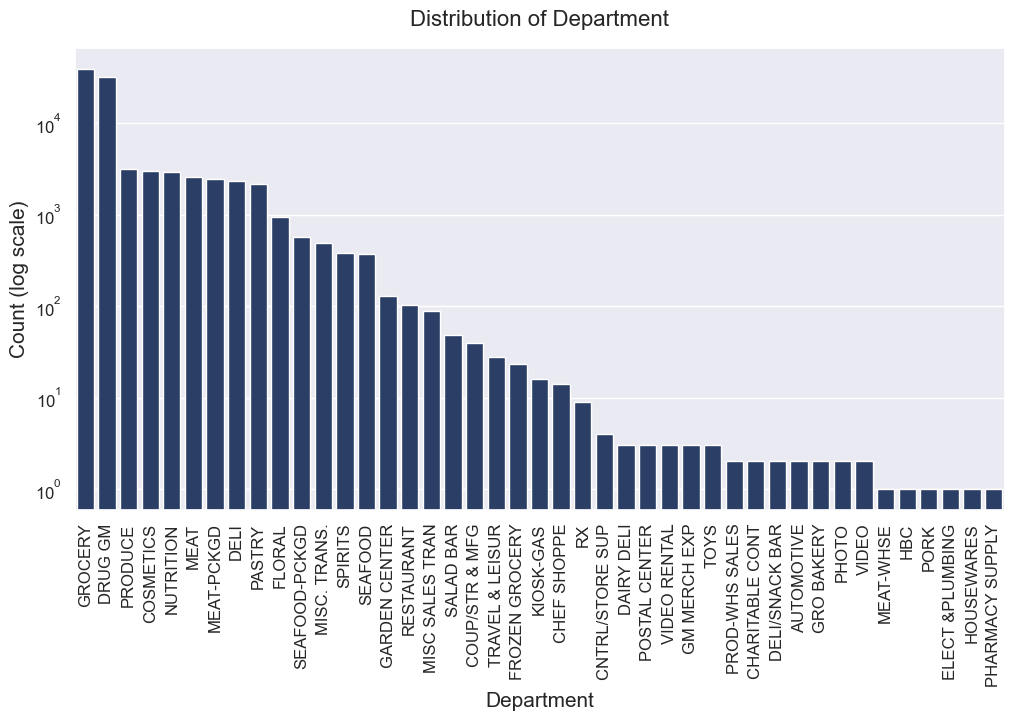

In [128]:
sns.set(
    style='darkgrid',
    palette='cividis',
    context='notebook'
)

plt.figure(figsize=(12, 6))

sort_department = product['department'].value_counts(ascending=False).index

department = sns.countplot(data=product, x='department', order=sort_department)

department.set_yscale('log')

department.set_title('Distribution of Department', size=16, y=1.03)
department.set_xlabel('Department', fontsize=15)
department.set_ylabel('Count (log scale)', fontsize=15)
department.tick_params(axis='both', which='major', labelsize=12)

plt.xticks(rotation=90)

plt.show()

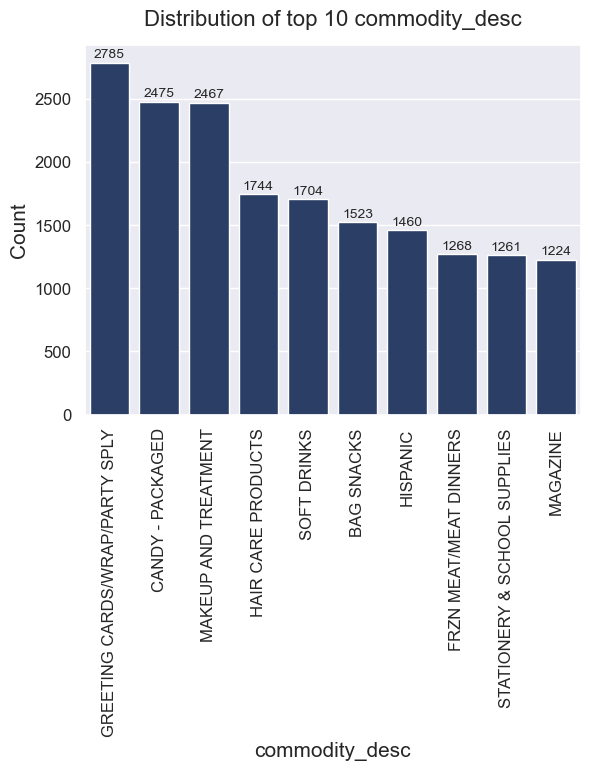

In [184]:
sns.set(
    style='darkgrid',
    palette='cividis',
    context='notebook'
)

top10_commodity_desc = product['commodity_desc'].value_counts(ascending=False).head(10)

commodity_desc = sns.barplot(x=top10_commodity_desc.index, y=top10_commodity_desc.values, order=top10_commodity_desc.index)

for i, v in enumerate(top10_commodity_desc):
    plt.text(i, v + 40, str(v), ha='center', fontsize=10)

commodity_desc.set_title('Distribution of top 10 commodity_desc', size=16, y=1.03)
commodity_desc.set_xlabel('commodity_desc', fontsize=15)
commodity_desc.set_ylabel('Count', fontsize=15)
commodity_desc.tick_params(axis='both', which='major', labelsize=12)

plt.xticks(rotation=90)

plt.show()

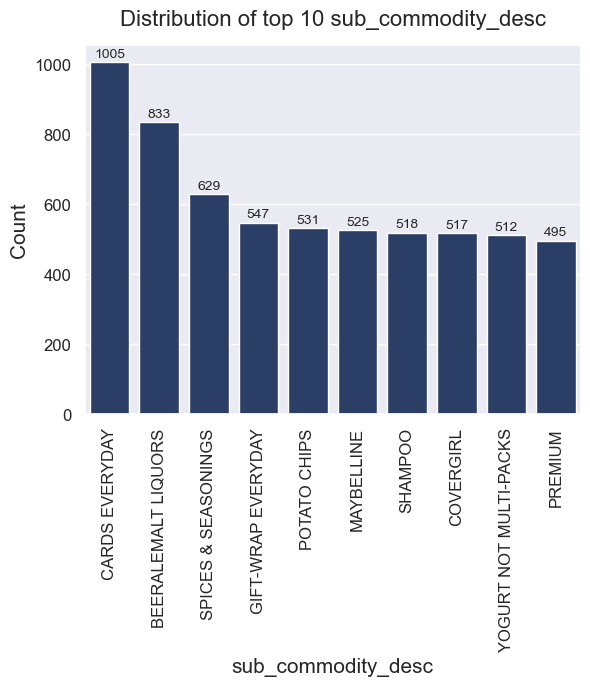

In [186]:
sns.set(
    style='darkgrid',
    palette='cividis',
    context='notebook'
)

top10_sub_commodity_desc = product['sub_commodity_desc'].value_counts(ascending=False).head(10)

sub_commodity_desc = sns.barplot(x=top10_sub_commodity_desc.index, y=top10_sub_commodity_desc.values, order=top10_sub_commodity_desc.index)

for i, v in enumerate(top10_sub_commodity_desc):
    plt.text(i, v + 15, str(v), ha='center', fontsize=10)

sub_commodity_desc.set_title('Distribution of top 10 sub_commodity_desc', size=16, y=1.03)
sub_commodity_desc.set_xlabel('sub_commodity_desc', fontsize=15)
sub_commodity_desc.set_ylabel('Count', fontsize=15)
sub_commodity_desc.tick_params(axis='both', which='major', labelsize=12)

plt.xticks(rotation=90)

plt.show()

# 3. EDA on hh_demographic table

In [6]:
hh_demographic.shape

(801, 6)

In [7]:
hh_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age_group       801 non-null    object
 1   gender          801 non-null    object
 2   income          801 non-null    object
 3   education       801 non-null    object
 4   household_size  801 non-null    object
 5   household_key   801 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 37.7+ KB


In [8]:
hh_demographic.isnull().sum()

age_group         0
gender            0
income            0
education         0
household_size    0
household_key     0
dtype: int64

In [9]:
hh_demographic.describe(include='all').round(2)

,age_group,gender,income,education,household_size,household_key
count,801,801,801,801,801,801.00
unique,6,3,4,6,5,NaN
top,45-54 yrs,Female,$45K-$100K,Bachelor’s degree,2,NaN
freq,288,344,460,255,318,NaN
mean,NaN,NaN,NaN,NaN,NaN,1235.18
std,NaN,NaN,NaN,NaN,NaN,736.80
min,NaN,NaN,NaN,NaN,NaN,1.00
25%,NaN,NaN,NaN,NaN,NaN,596.00
50%,NaN,NaN,NaN,NaN,NaN,1218.00
75%,NaN,NaN,NaN,NaN,NaN,1914.00


In [10]:
unique_hh_demographic = hh_demographic.select_dtypes(include='number').nunique()
unique_hh_demographic

household_key    801
dtype: int64

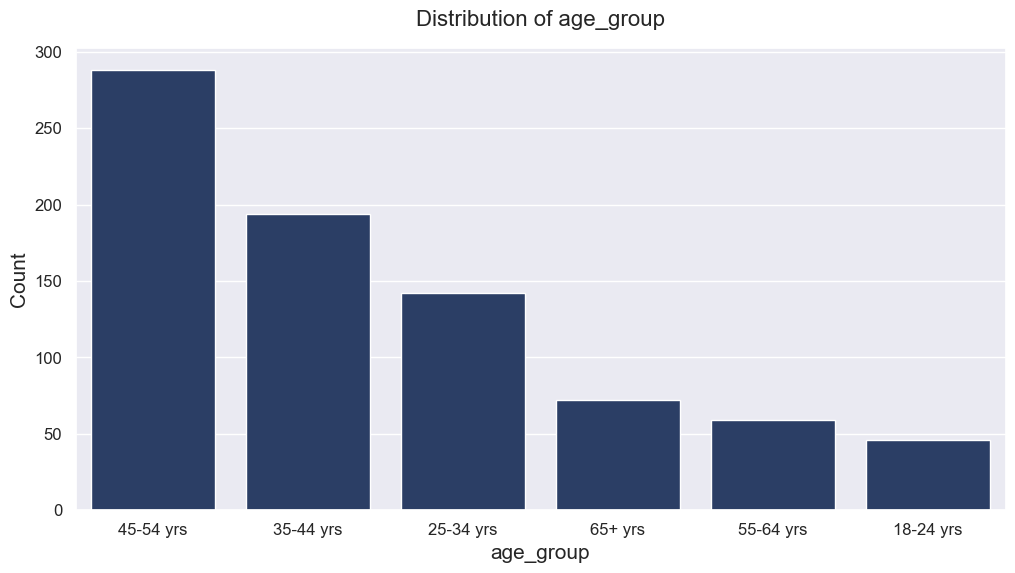

In [13]:
sns.set(
    style='darkgrid',
    palette='cividis',
    context='notebook'
)

plt.figure(figsize=(12, 6))

sort_age_group = hh_demographic['age_group'].value_counts(ascending=False).index

age_group = sns.countplot(data=hh_demographic, x='age_group', order=sort_age_group)

age_group.set_title('Distribution of age_group', size=16, y=1.03)
age_group.set_xlabel('age_group', fontsize=15)
age_group.set_ylabel('Count', fontsize=15)
age_group.tick_params(axis='both', which='major', labelsize=12)


plt.show()

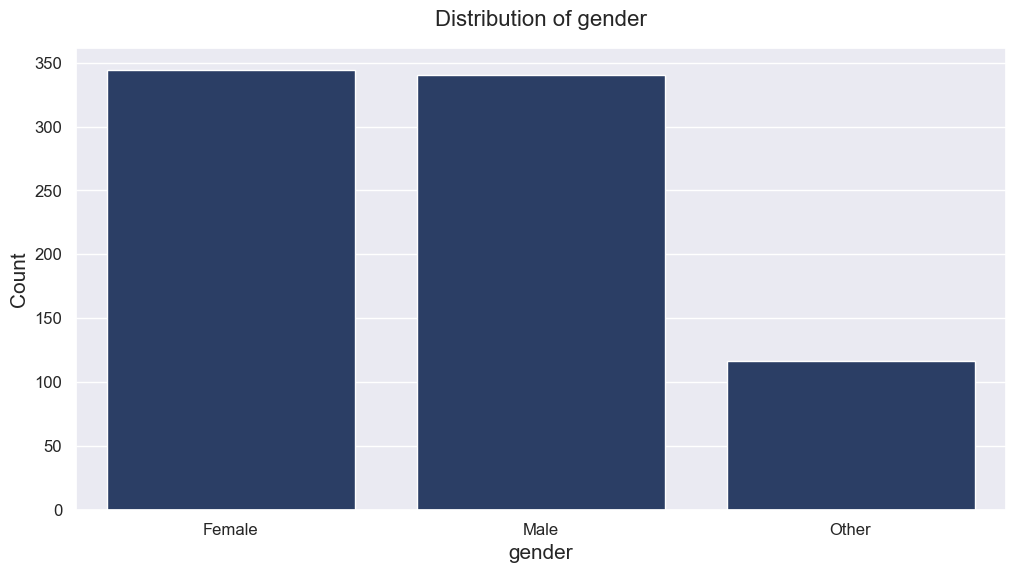

In [14]:
sns.set(
    style='darkgrid',
    palette='cividis',
    context='notebook'
)

plt.figure(figsize=(12, 6))

sort_gender = hh_demographic['gender'].value_counts(ascending=False).index

gender = sns.countplot(data=hh_demographic, x='gender', order=sort_gender)

gender.set_title('Distribution of gender', size=16, y=1.03)
gender.set_xlabel('gender', fontsize=15)
gender.set_ylabel('Count', fontsize=15)
gender.tick_params(axis='both', which='major', labelsize=12)

plt.show()

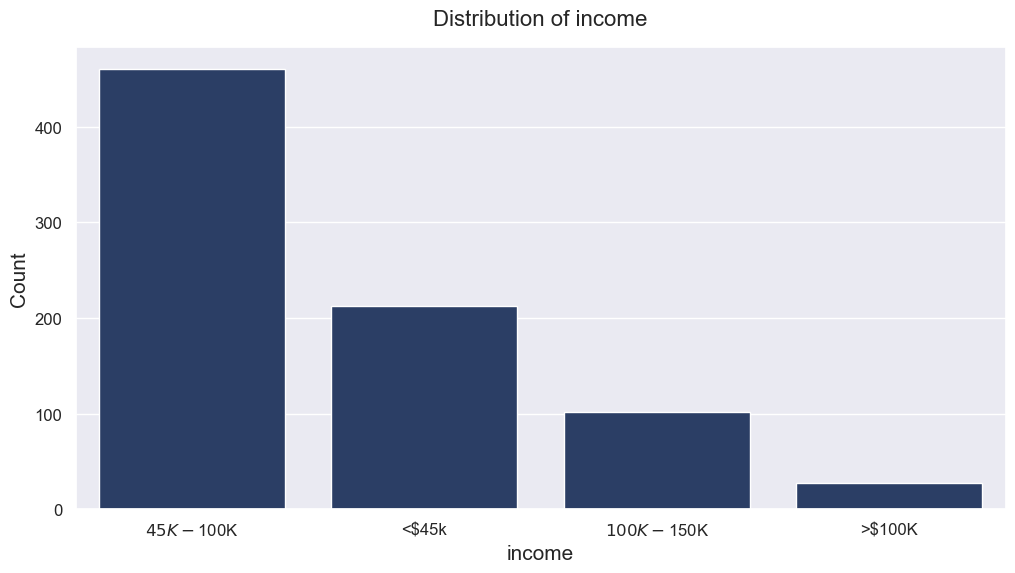

In [15]:
sns.set(
    style='darkgrid',
    palette='cividis',
    context='notebook'
)

plt.figure(figsize=(12, 6))

sort_income = hh_demographic['income'].value_counts(ascending=False).index

income = sns.countplot(data=hh_demographic, x='income', order=sort_income)

income.set_title('Distribution of income', size=16, y=1.03)
income.set_xlabel('income', fontsize=15)
income.set_ylabel('Count', fontsize=15)
income.tick_params(axis='both', which='major', labelsize=12)

plt.show()

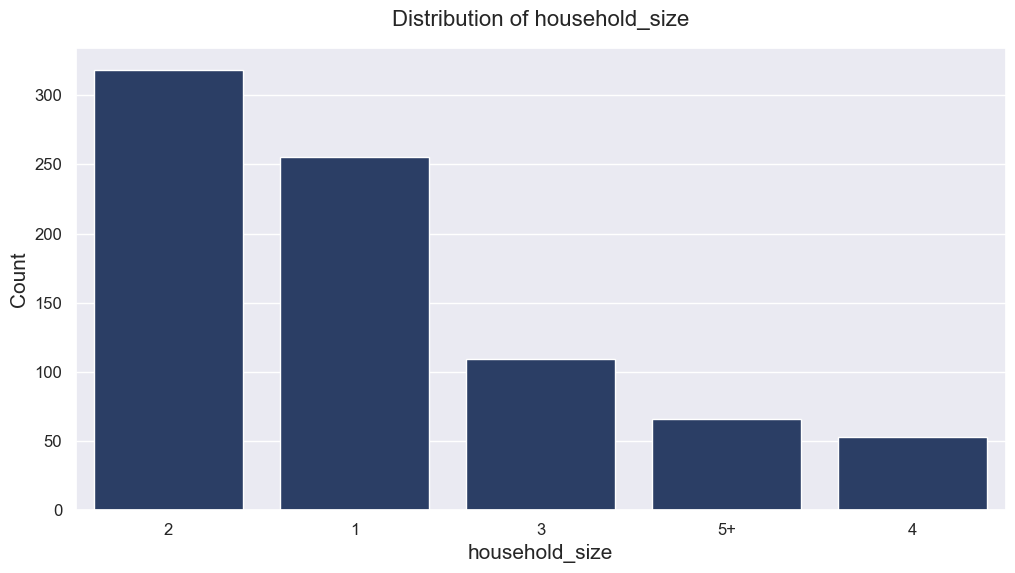

In [16]:
sns.set(
    style='darkgrid',
    palette='cividis',
    context='notebook'
)

plt.figure(figsize=(12, 6))

sort_household_size = hh_demographic['household_size'].value_counts(ascending=False).index

household_size = sns.countplot(data=hh_demographic, x='household_size', order=sort_household_size)

household_size.set_title('Distribution of household_size', size=16, y=1.03)
household_size.set_xlabel('household_size', fontsize=15)
household_size.set_ylabel('Count', fontsize=15)
household_size.tick_params(axis='both', which='major', labelsize=12)

plt.show()

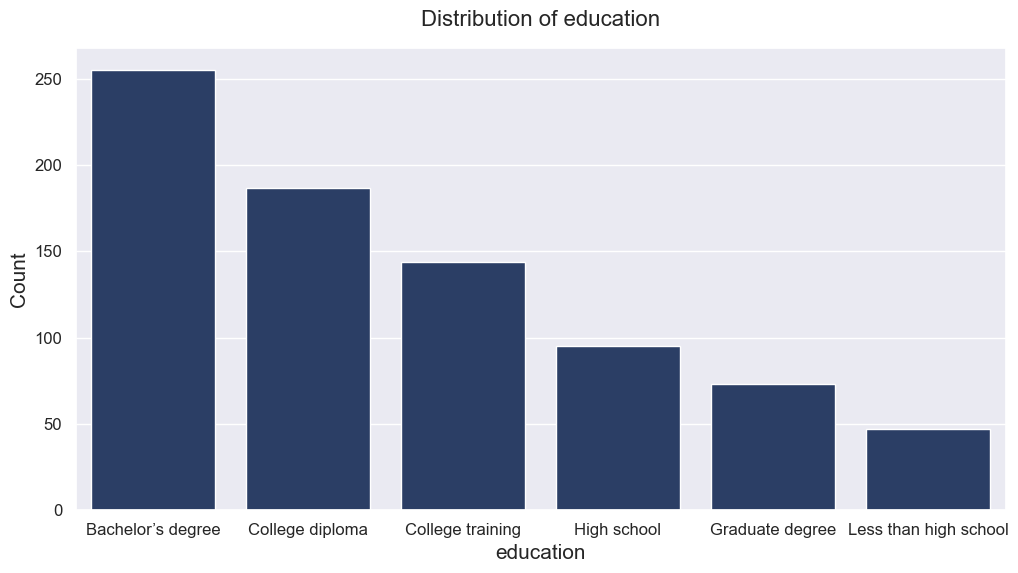

In [17]:
sns.set(
    style='darkgrid',
    palette='cividis',
    context='notebook'
)

plt.figure(figsize=(12, 6))

sort_education = hh_demographic['education'].value_counts(ascending=False).index

education = sns.countplot(data=hh_demographic, x='education', order=sort_education)

education.set_title('Distribution of education', size=16, y=1.03)
education.set_xlabel('education', fontsize=15)
education.set_ylabel('Count', fontsize=15)
education.tick_params(axis='both', which='major', labelsize=12)

plt.show()

# 4. EDA on campaigns table

In [31]:
campaigns.shape

(7208, 6)

In [32]:
campaigns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7208 entries, 0 to 7207
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   description    7208 non-null   object
 1   campaign       7208 non-null   int64 
 2   household_key  7208 non-null   int64 
 3   start_day      7208 non-null   int64 
 4   end_day        7208 non-null   int64 
 5   duration       7208 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 338.0+ KB


In [33]:
campaigns.isnull().sum()

description      0
campaign         0
household_key    0
start_day        0
end_day          0
duration         0
dtype: int64

In [34]:
summary_campaigns = campaigns.describe(include='all').round(2)
summary_campaigns

,description,campaign,household_key,start_day,end_day,duration
count,7208,7208.00,7208.00,7208.00,7208.00,7208.00
unique,3,NaN,NaN,NaN,NaN,NaN
top,TypeA,NaN,NaN,NaN,NaN,NaN
freq,3979,NaN,NaN,NaN,NaN,NaN
mean,NaN,17.16,1268.70,488.40,533.90,46.50
std,NaN,7.30,731.94,113.29,115.54,11.71
min,NaN,1.00,1.00,224.00,264.00,33.00
25%,NaN,13.00,644.00,412.00,460.00,35.00
50%,NaN,18.00,1263.00,504.00,551.00,48.00
75%,NaN,23.00,1924.00,587.00,642.00,54.00


In [35]:
unique_campaigns = campaigns.select_dtypes(include='number').nunique()
unique_campaigns

campaign           30
household_key    1584
start_day          27
end_day            28
duration           17
dtype: int64

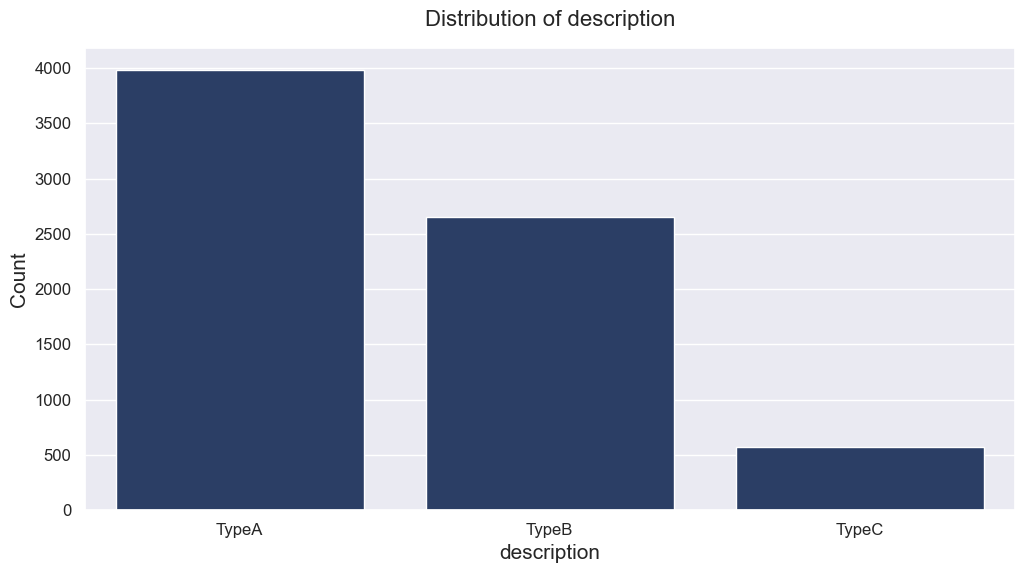

In [36]:
sns.set(
    style='darkgrid',
    palette='cividis',
    context='notebook'
)

plt.figure(figsize=(12, 6))

sort_campagin_description = campaigns['description'].value_counts(ascending=False).index

campaigns = sns.countplot(data=campaigns, x='description', order=sort_campagin_description)

campaigns.set_title('Distribution of description', size=16, y=1.03)
campaigns.set_xlabel('description', fontsize=15)
campaigns.set_ylabel('Count', fontsize=15)
campaigns.tick_params(axis='both', which='major', labelsize=12)

plt.show()

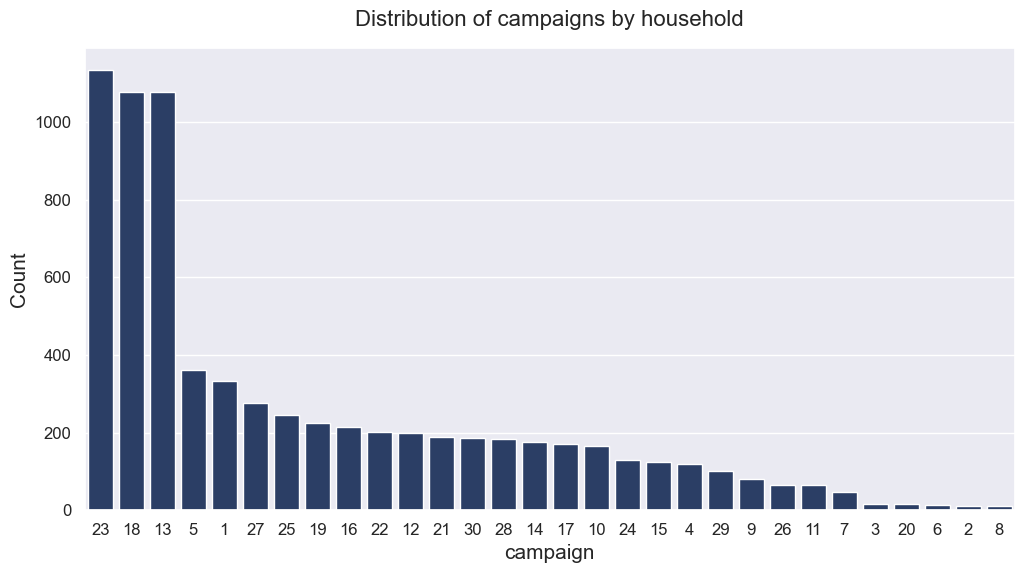

In [39]:
sns.set(
    style='darkgrid',
    palette='cividis',
    context='notebook'
)

plt.figure(figsize=(12, 6))

sort_campaign = campaigns['campaign'].value_counts(ascending=False).index

campaign_plt = sns.countplot(data=campaigns, x='campaign', order=sort_campaign)

campaign_plt.set_title('Distribution of campaigns by household', size=16, y=1.03)
campaign_plt.set_xlabel('campaign', fontsize=15)
campaign_plt.set_ylabel('Count', fontsize=15)
campaign_plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

**Compare the number of unique values for** `household_key` **in `transaction_data`, `hh_demographic` and `campaigns` tables.**

In [44]:
print('Number of unique values of household_key in transaction_data table:', unique_transaction_data['household_key'])
print('Number of unique values of household_key in hh_demographic table:', unique_hh_demographic['household_key'])

Number of unique values of household_key in transaction_data table: 2500
Number of unique values of household_key in hh_demographic table: 801


**Compare days of the campaigns in `transaction_data` with `campaigns` table.**

In [45]:
transaction_first_day = transaction_data['day'].min()
transaction_last_day = transaction_data['day'].max()

transaction_vs_campaign_days = pd.DataFrame({
    'Table': ['transaction_data', 'campaigns'],
    'Min Day': [transaction_first_day, int(summary_campaigns.loc['min']['start_day'])],
    'Max Day': [transaction_last_day, int(summary_campaigns.loc['max']['end_day'])]
}
                                           )
transaction_vs_campaign_days

,Table,Min Day,Max Day
0,transaction_data,1,711
1,campaigns,224,719


**Check which campaigns have days which are not in `transaction_data` table.**

In [46]:
campaigns_not_in_transactions = campaigns[(campaigns['end_day'] > 711) | (campaigns['start_day'] > 711)]['campaign'].value_counts()
print('campaign(s) are not in the transaction_data table:', campaigns_not_in_transactions.index[0])

start_day_campaigns_not_in_transactions = campaigns[campaigns['campaign'] == campaigns_not_in_transactions.index[0]]['start_day'].unique()
print('start day for the campaigns which some of their days are not in transaction data table:', start_day_campaigns_not_in_transactions[0])

campaign(s) are not in the transaction_data table: 29
start day for the campaigns which some of their days are not in transaction data table: 659


**Plot duration of campaigns**

In [47]:
campaign_start_day = campaigns.groupby('campaign')['start_day'].mean() # get the start day of a campaing
campaign_end_day = campaigns.groupby('campaign')['end_day'].mean() # get the final day of a campaing
campaign_num = campaign_start_day.index # get the number of campaign
duration = campaign_end_day - campaign_start_day
campaign_num

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
      dtype='int64', name='campaign')

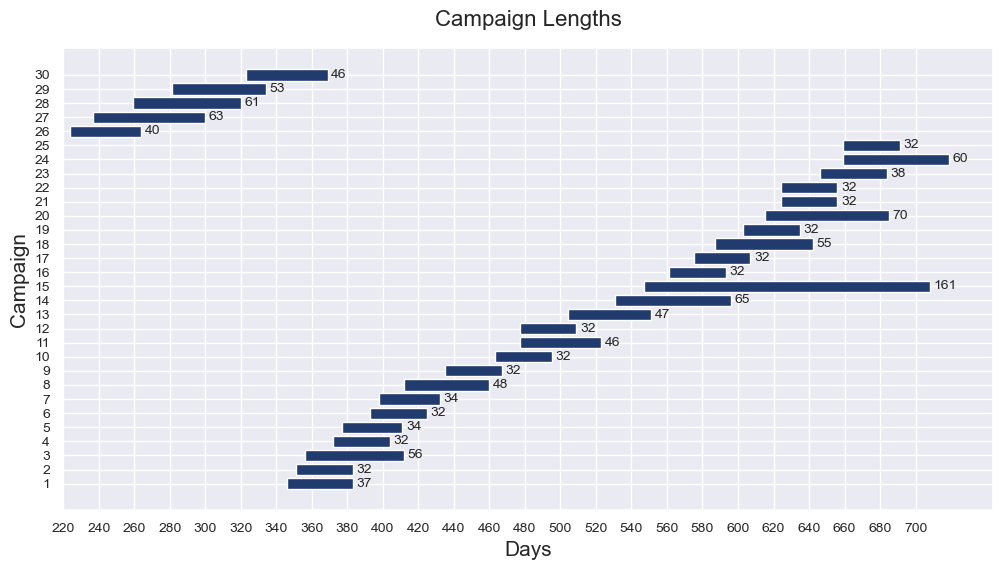

In [102]:
sns.set(
    style='darkgrid',
    palette='cividis',
    context='notebook'
)

plt.figure(figsize=(12, 6))

campaigns_duration = plt.barh(campaign_num, duration, left=campaign_start_day)

for i, v in enumerate(duration):
    plt.text(campaign_start_day.iloc[i] + v + 2, i + 1, str(int(v)), va='center', fontsize=10)


plt.title('Campaign Lengths', size=16, y=1.03)
plt.xlabel('Days', fontsize=15)
plt.ylabel('Campaign', fontsize=15)
plt.xticks(np.arange(min(campaign_start_day)-4, max(campaign_end_day), 20))
plt.yticks(campaign_num)
plt.tick_params(axis='both', which='major', labelsize=10)

plt.show()

**Adjust the number of campaigns based on their start day and order**

In [124]:
campaigns['campaign'] = np.where(campaigns['campaign'] < 26, campaigns['campaign'] + 5, campaigns['campaign'] - 25)

In [125]:
campaigns

,description,campaign,household_key,start_day,end_day,duration
0,TypeA,1,17,224,264,41
1,TypeA,1,27,224,264,41
2,TypeA,1,212,224,264,41
3,TypeA,1,208,224,264,41
4,TypeA,1,192,224,264,41
...,...,...,...,...,...,...
7203,TypeC,20,1803,547,708,162
7204,TypeC,20,1082,547,708,162
7205,TypeC,20,942,547,708,162
7206,TypeC,20,855,547,708,162


In [127]:
campaign_start_day = campaigns.groupby('campaign')['start_day'].mean() # get the start day of a campaing
campaign_end_day = campaigns.groupby('campaign')['end_day'].mean() # get the final day of a campaing
campaign_num = campaign_start_day.index # get the number of campaign
duration = campaign_end_day - campaign_start_day
campaign_num

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
      dtype='int64', name='campaign')

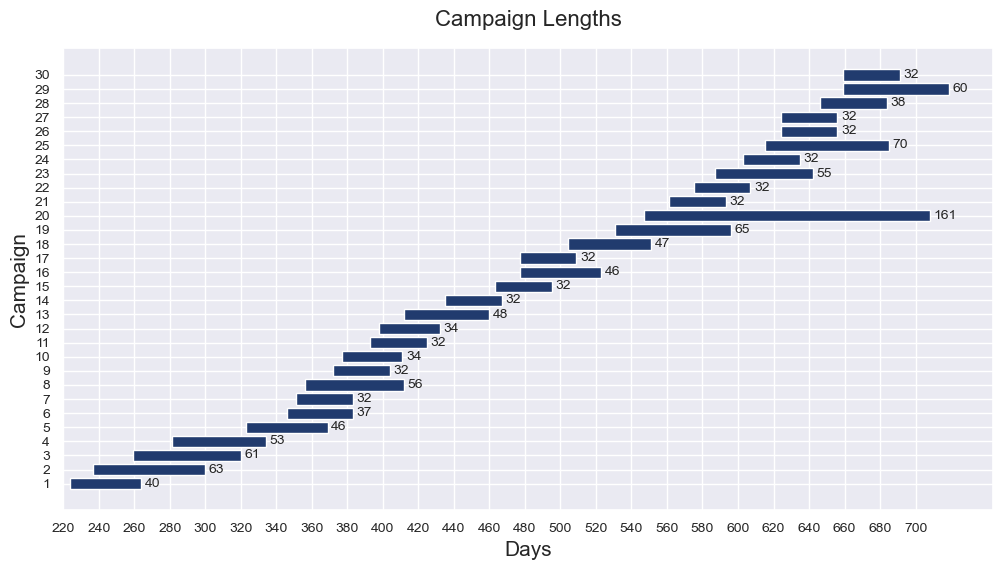

In [128]:
sns.set(
    style='darkgrid',
    palette='cividis',
    context='notebook'
)

plt.figure(figsize=(12, 6))

campaigns_duration = plt.barh(campaign_num, duration, left=campaign_start_day)

for i, v in enumerate(duration):
    plt.text(campaign_start_day.iloc[i] + v + 2, i + 1, str(int(v)), va='center', fontsize=10)


plt.title('Campaign Lengths', size=16, y=1.03)
plt.xlabel('Days', fontsize=15)
plt.ylabel('Campaign', fontsize=15)
plt.xticks(np.arange(min(campaign_start_day)-4, max(campaign_end_day), 20))
plt.yticks(campaign_num)
plt.tick_params(axis='both', which='major', labelsize=10)

plt.show()

**upload adjusted `campaigns` table to SQL Server**

In [130]:
campaigns.to_sql('campaigns', con=engine, if_exists='replace', index=False)

228

**NOTE: Check which campaigns have days which are not in `transaction_data` table.**

In [131]:
campaigns_not_in_transactions = campaigns[(campaigns['end_day'] > 711) | (campaigns['start_day'] > 711)]['campaign'].value_counts()
print('campaign(s) are not in the transaction_data table:', campaigns_not_in_transactions.index[0])

start_day_campaigns_not_in_transactions = campaigns[campaigns['campaign'] == campaigns_not_in_transactions.index[0]]['start_day'].unique()
print('start day for the campaigns which some of their days are not in transaction data table:', start_day_campaigns_not_in_transactions[0])

campaign(s) are not in the transaction_data table: 29
start day for the campaigns which some of their days are not in transaction data table: 659
